## GNNShap Explanation Visualization

**__Please make sure to run this notebook from the project's root directory.__**


In [1]:
import time

import matplotlib

matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
import torch

from dataset.utils import get_model_data_config
from gnnshap.explainer import GNNShapExplainer

In [2]:
dataset_name = 'Cora'
num_samples = 25000
batch_size = 1024
sampler = 'GNNShapSampler'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# get mode, data and config
model, data, config = get_model_data_config(dataset_name, load_pretrained=True, device=device)

### Node 37 explanation

In [3]:
explain_node_idx = 37

gshap = GNNShapExplainer(model, data, nhops=config['num_hops'], verbose=0, device=device,
                    progress_hide=True)
start_time = time.time()

explanation = gshap.explain(explain_node_idx, nsamples=num_samples,
                                                        sampler_name=sampler,
                                                        batch_size=batch_size)

### Shapley values

In [4]:
explanation.shap_values

array([ 0.04673493, -0.04081373,  0.00817486, -0.01765383, -0.25874567,
        0.00416122, -0.01150306,  0.40779454, -0.04571178,  0.03535423,
       -0.06290591,  0.1204979 ], dtype=float32)

### Fidelity score for an explanation

In [5]:
explanation.fidelity_prob(model, data, sparsity=0.3, score_type='neg')

(0.04852336645126343, 0.25)

### Explanation times

In [6]:

explanation.time_comp_graph, explanation.time_sampling, explanation.time_predictions, explanation.time_solver

(0.0008001327514648438,
 0.0005056858062744141,
 0.02694559097290039,
 0.20291876792907715)

### Explanation Graph

Blue edges reduce the prediction score while red edges increase the score.

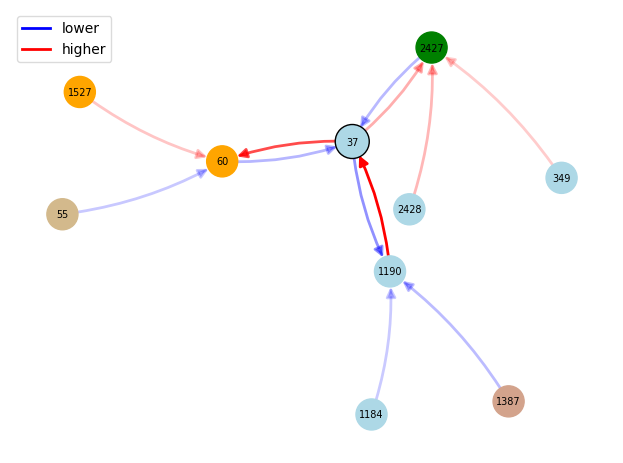

In [7]:
explanation.plot_graph(show_scores=False, show=False)
plt.tight_layout()
plt.box(False)
#plt.savefig('ExplanationGraph.pdf', dpi=300, bbox_inches='tight')

### Bar plot

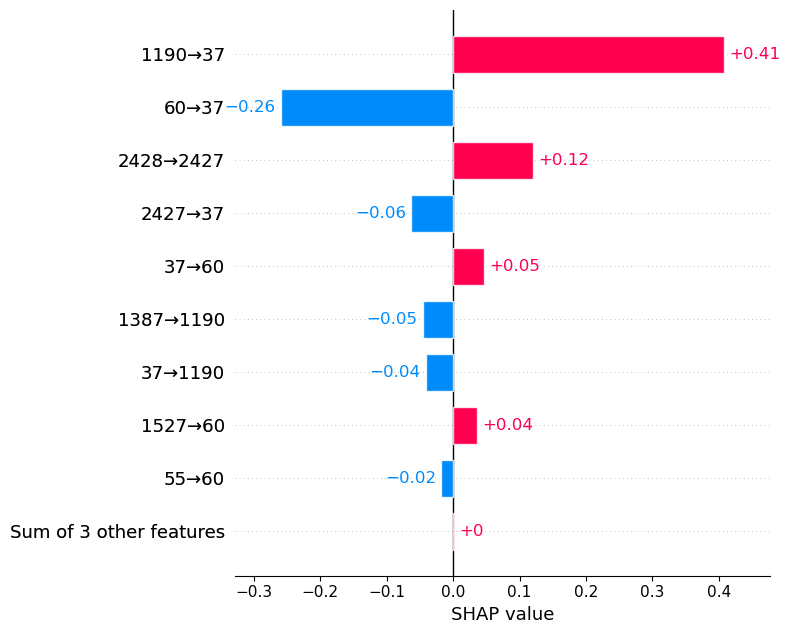

In [8]:
explanation.plot_bar(show=False)
plt.tight_layout()
#plt.savefig("BarVisualization.pdf", dpi=300, bbox_inches='tight')

### Force plot

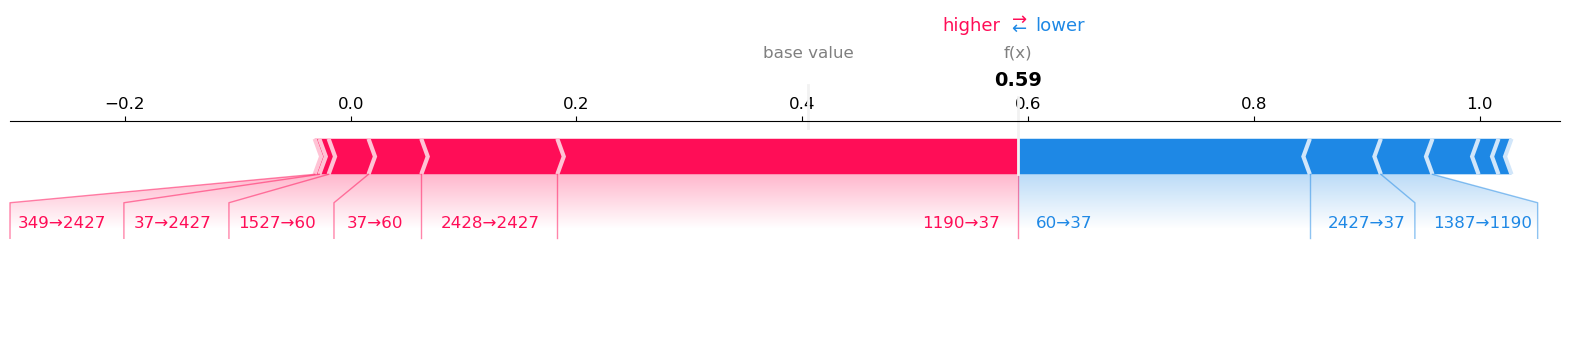

In [9]:
explanation.plot_force(show_values=False)